In [1]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.image as mp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
with open('/content/drive/My Drive/Main/train.mn.txt') as file:
    mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train.en.txt') as file:
    eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train_images.txt') as file:
    train_images = file.read().split('\n')


In [70]:
train_images[-1]

''

In [71]:
#removing last elements which containing special characters
mal_txt.pop()
mal_txt.pop()
eng_txt.pop()
eng_txt.pop()
train_images.pop()
print(len(mal_txt))
print(len(eng_txt))
print(len(train_images))
img_path=[]
for s in train_images:
    img_path.append("/content/drive/My Drive/Main/trainimages/train/"+s)

28930
28931
28931


In [72]:
print(mal_txt[1])
print(eng_txt[1])

ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
it is an indoor scene						


In [73]:
mal_txt[0:15]

['ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ',
 'ഇത് ഒരു ഇൻഡോർ രംഗമാണ്',
 'കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി',
 'മനുഷ്യന് ചെറിയ മുടിയുണ്ട്',
 'ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു',
 'കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട്',
 'ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി',
 'ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ്',
 'മതിൽ വെളുത്ത ചായം പൂശി',
 'ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ',
 'സമുദ്രം അഭിമുഖീകരിക്കുന്ന സ്ത്രീ',
 'ഇതൊരു ഓഫീസ് രേഖാചിത്രം',
 'നാല് ലോഹത്തിന്റെ കസേരകൾ',
 'കോലാഹലം ഒരു മേശപ്പുറത്താണ്',
 'ഒരു വെളുത്ത മൈക്രോവേവ് ഓവൻ']

In [74]:
eng_txt[0:15]

['Male surfer surfing in still in the ocean',
 'it is an indoor scene\t\t\t\t\t\t',
 'Computer screens turned on\t\t\t\t\t\t',
 'man has short hair\t\t\t\t\t\t',
 "photo album open on an adult's lap\t\t\t\t\t\t",
 'there is a group of girls beside the black car\t\t\t\t\t\t',
 'Child in a stroller\t\t\t\t\t\t',
 'Tall metal lightpost\t\t\t\t\t\t',
 'wall is painted white\t\t\t\t\t\t',
 'there are several pictures on the wall\t\t\t\t\t\t',
 'woman facing the ocean\t\t\t\t\t\t',
 'this is an office layout\t\t\t\t\t\t',
 'four metallic chairs\t\t\t\t\t\t',
 'Clutter is on a table\t\t\t\t\t\t',
 'a white microwave oven\t\t\t\t\t\t']

/content/drive/My Drive/Main/trainimages/train/11.jpg
mal:ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
eng:it is an indoor scene						


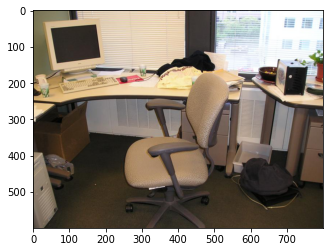

In [75]:
im=mp.imread(img_path[1])
plt.imshow(im)
print(img_path[1])
print("mal:"+mal_txt[1])
print("eng:"+eng_txt[1])

/content/drive/My Drive/Main/trainimages/train/10.jpg
mal:ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ
eng:Male surfer surfing in still in the ocean


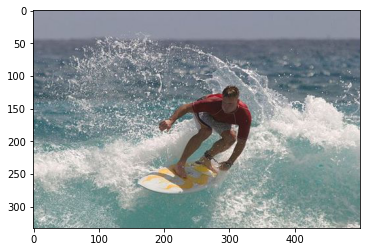

In [76]:
im=mp.imread(img_path[0])
plt.imshow(im)
print(img_path[0])
print("mal:"+mal_txt[0])
print("eng:"+eng_txt[0])

In [77]:
#Manually splitting data for training and texting-due to presence of 3 inputs split using Sklearn  is not efficeint
splits=5000
mal_train=mal_txt[:splits]
eng_train=eng_txt[:splits]

In [78]:
mal_df = pd.DataFrame(mal_train, columns=['Malayalam']) 
eng_df = pd.DataFrame(eng_train, columns=['English']) 


In [79]:
mal_df.head(10)

,Malayalam
0,ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ
1,ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
2,കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി
3,മനുഷ്യന് ചെറിയ മുടിയുണ്ട്
4,ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു
5,കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട്
6,ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി
7,ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ്
8,മതിൽ വെളുത്ത ചായം പൂശി
9,ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന...


In [80]:
eng_df.head(10)

,English
0,Male surfer surfing in still in the ocean
1,it is an indoor scene\t\t\t\t\t\t
2,Computer screens turned on\t\t\t\t\t\t
3,man has short hair\t\t\t\t\t\t
4,photo album open on an adult's lap\t\t\t\t\t\t
5,there is a group of girls beside the black car...
6,Child in a stroller\t\t\t\t\t\t
7,Tall metal lightpost\t\t\t\t\t\t
8,wall is painted white\t\t\t\t\t\t
9,there are several pictures on the wall\t\t\t\t...


In [81]:
#Datacleaning by removing special characters
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r" ᠃", "", text)
    text = re.sub(r" ᠂", "", text)
    text = re.sub(r"-", " ", text)
    text = re.sub(r"<5>", "5", text)
    text = re.sub(r"“ ", "", text)
    text = re.sub(r" ”", "", text)
    text = re.sub(r"[+\.\!\/_,$%^*(+\"\']+|[+——！，〈〉《》。︱？?、．％~@#￥%……&*（）’]", "", text)
    text=text.rstrip()
    return text



In [82]:
mal_text1 = mal_df["Malayalam"].apply(clean_text)
eng_text1 = eng_df["English"].apply(clean_text)
mal_text2 = list(mal_text1.values)
eng_text2 = list(eng_text1.values)

In [83]:
#cleaned Malayalm data
mal_text1

0        ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ
1                              ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
2                     കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി
3                          മനുഷ്യന് ചെറിയ മുടിയുണ്ട്
4       ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു
                            ...                     
4995            ഫ്രിസ്‌ബീ ഉള്ള പുൽത്തകിടിയിൽ ഒരു നായ
4996        ഒരു ഉദ്യാനത്തിൽ ചാരനിറത്തിലുള്ള ലോഹ വേലി
4997               തവിട്ടുനിറമുള്ള മുടിയുള്ള മനുഷ്യൻ
4998                    ഒരു ജിറാഫ് പുല്ല് തിന്നുന്നു
4999                      മുൻവശത്തുള്ള ഒരു പെൺകുട്ടി
Name: Malayalam, Length: 5000, dtype: object

In [84]:
#cleaned English data
eng_text1

0       male surfer surfing in still in the ocean
1                           it is an indoor scene
2                      computer screens turned on
3                              man has short hair
4               photo album open on an adults lap
                          ...                    
4995               a dog on a lawn with a frisbee
4996                 a gray metal fence in a park
4997                           a brown haired man
4998                           the floor is tiled
4999               a young girl in the foreground
Name: English, Length: 5000, dtype: object

In [85]:
mal_text2[1:5]

['ഇത് ഒരു ഇൻഡോർ രംഗമാണ്',
 'കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി',
 'മനുഷ്യന് ചെറിയ മുടിയുണ്ട്',
 'ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു']

In [86]:
eng_text2[1:5]

['it is an indoor scene',
 'computer screens turned on',
 'man has short hair',
 'photo album open on an adults lap']

In [87]:
#Adding starting and ending tokens
eng_temp=[]
for s in mal_text2:
    temp="sos "+s+" eos"
    eng_temp.append(temp)
#text2=[]
mal_text2=eng_temp
mal_text2[1:10]

['sos ഇത് ഒരു ഇൻഡോർ രംഗമാണ് eos',
 'sos കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി eos',
 'sos മനുഷ്യന് ചെറിയ മുടിയുണ്ട് eos',
 'sos ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു eos',
 'sos കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട് eos',
 'sos ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി eos',
 'sos ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ് eos',
 'sos മതിൽ വെളുത്ത ചായം പൂശി eos',
 'sos ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


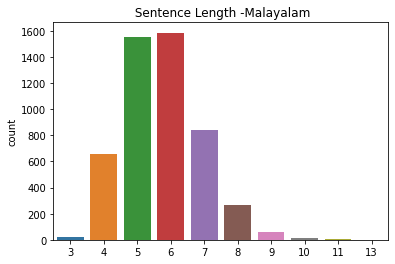

In [88]:
import seaborn as sn
import matplotlib.pyplot as plt
malayalam_words = []
for i in mal_text2:
    malayalam_words.append(len(i.split()))
sn.countplot(malayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


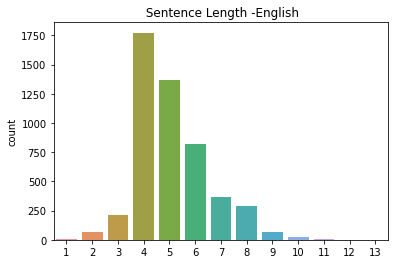

In [89]:
english_words = []
for j in eng_text2:
    english_words.append(len(j.split()))
sn.countplot(english_words).set(title=' Sentence Length -English')
plt.show()

In [90]:
maxlen_malayalam = max(malayalam_words)
maxlen_english = max(english_words)
print('Maximum sentence length-Malayalam :',maxlen_malayalam)
print('Maximum sentence length-English :',maxlen_english)

Maximum sentence length-Malayalam : 13
Maximum sentence length-English : 13


In [91]:
#splitting training data into training and validation data
x_tr=eng_text2[:splits-500]
y_tr=mal_text2[:splits-500]
x_val=eng_text2[splits-500:]
y_val=mal_text2[splits-500:]


In [92]:
x_tr[1:5]

['it is an indoor scene',
 'computer screens turned on',
 'man has short hair',
 'photo album open on an adults lap']

In [93]:
y_tr[1:5]

['sos ഇത് ഒരു ഇൻഡോർ രംഗമാണ് eos',
 'sos കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി eos',
 'sos മനുഷ്യന് ചെറിയ മുടിയുണ്ട് eos',
 'sos ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു eos']

In [94]:
len(x_tr)

4500

In [95]:
len(x_val)

500

In [96]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tr)
x_tr = x_tokens.texts_to_sequences(x_tr)
x_val = x_tokens.texts_to_sequences(x_val)
print('x_tr:',x_tr)
print('x_val:',x_val)

x_tr: [[587, 365, 296, 6, 741, 6, 2, 271], [187, 5, 41, 742, 145], [90, 1049, 393, 3], [8, 43, 237, 66], [221, 1050, 124, 3, 41, 1051, 743], [366, 5, 1, 165, 4, 501, 367, 2, 10, 23], [188, 6, 1, 588], [97, 88, 1052], [14, 5, 222, 7], [366, 48, 331, 744, 3, 2, 14], [21, 272, 2, 271], [22, 5, 41, 442, 1053], [238, 745, 332], [1054, 5, 3, 1, 32], [1, 7, 368, 297], [7, 273, 174, 298, 443], [17, 206, 24, 13, 73], [8, 6, 78, 207, 274, 3, 9], [16, 3, 2, 9], [1, 8, 35, 6, 502, 257], [258, 86, 3, 14], [195, 4, 2, 70], [16, 4, 1, 64], [2, 239, 5, 138], [1, 8, 444, 1, 240], [1, 17, 746, 6, 29], [113, 13, 747, 445], [208, 3, 2, 54], [1, 589, 7, 54], [10, 175, 394], [1, 17, 1055, 590, 6, 2, 241, 4, 2, 23], [18, 23, 44, 299, 1, 24], [23, 3, 2, 24], [748, 749, 20, 1056], [1, 10, 23, 13, 1, 26, 98], [70, 65, 2, 32], [1, 1057, 52, 3, 1, 189], [153, 223, 4, 1, 9], [16, 3, 1, 9], [25, 32, 35, 3, 49, 4, 1, 132], [132, 113, 5, 3], [1, 26, 45], [333, 4, 2, 39], [750, 74, 176, 2, 9], [503, 10, 60, 13, 1, 7, 

In [97]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
x_tr = pad_sequences(x_tr,maxlen = maxlen_english,padding = 'post')
x_val = pad_sequences(x_val,maxlen = maxlen_english,padding = 'post')

# +1 for padding 
x_voc_size   =  len(x_tokens.word_index) +1
print("No of unique words in English",x_voc_size)

No of unique words in English 2040


In [98]:
# English data preprocessing
from keras.preprocessing.text import Tokenizer
y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tr)

y_tr = y_tokens.texts_to_sequences(y_tr)
y_val = y_tokens.texts_to_sequences(y_val)

from keras.preprocessing.sequence import pad_sequences
y_tr = pad_sequences(y_tr,maxlen = maxlen_malayalam,padding = 'post')
y_val = pad_sequences(y_val,maxlen = maxlen_malayalam,padding = 'post')

# +1 for padding 
y_voc_size   =  len(y_tokens.word_index) +1
print("No of unique words in Malyalam",y_voc_size)


No of unique words in Malyalam 3530


In [99]:
pip install keras-applications

In [100]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings


In [101]:
#Loading VGG model for Feature Extraction-Removing classification layers from memory
modelvgg = VGG16(include_top=True,weights="imagenet")
modelvgg.layers.pop()
modelvgg = Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output)
modelvgg.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [102]:
pip install cv

In [103]:
import cv2
import cv

In [104]:
#tRY RESNET

In [105]:
#Resizing image and converting grey scale images into RGB images
#split=5000
imagedata=np.zeros(shape=(splits,224,224,3))
for i in range(splits):
    temp=mp.imread(img_path[i])
    if (len(temp.shape)==3):
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp
    elif (len(temp.shape)<3):
       #plt.imshow(temp)
       temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp    
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)

In [106]:
imagedata[1:10]

array([[[[0.4626  , 0.443   , 0.3254  ],
         [0.4548  , 0.4353  , 0.3176  ],
         [0.4666  , 0.447   , 0.3293  ],
         ...,
         [0.902   , 0.933   , 0.9453  ],
         [0.906   , 0.937   , 0.949   ],
         [0.906   , 0.937   , 0.949   ]],

        [[0.4666  , 0.447   , 0.3293  ],
         [0.4587  , 0.4392  , 0.3215  ],
         [0.4707  , 0.451   , 0.3333  ],
         ...,
         [0.949   , 0.9805  , 0.9883  ],
         [0.9453  , 0.9766  , 0.9883  ],
         [0.9453  , 0.9766  , 0.9883  ]],

        [[0.4707  , 0.451   , 0.3333  ],
         [0.4626  , 0.443   , 0.3254  ],
         [0.4785  , 0.4587  , 0.341   ],
         ...,
         [0.961   , 0.992   , 1.      ],
         [0.9453  , 0.9766  , 0.992   ],
         [0.9453  , 0.9766  , 0.992   ]],

        ...,

        [[0.3098  , 0.2864  , 0.2393  ],
         [0.341   , 0.3098  , 0.2666  ],
         [0.3647  , 0.3254  , 0.2864  ],
         ...,
         [0.1686  , 0.153   , 0.1059  ],
         [0.1647  , 0.

In [ ]:
with open('/content/drive/My Drive/Main/imagedatas.txt', 'w') as writefile:
    writefile.write("imagedata")

In [108]:

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
jpgs=img_path[:splits]
images_new = OrderedDict()
npix = 224
target_size = (npix,npix,3)
for i,name in enumerate(jpgs): 
    filename = name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    nimage = preprocess_input(image)
    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    images_new [name] = y_pred.flatten()
    if i%200==0:
        print(i,filename)

0 /content/drive/My Drive/Main/trainimages/train/10.jpg
200 /content/drive/My Drive/Main/trainimages/train/739.jpg
400 /content/drive/My Drive/Main/trainimages/train/1529.jpg
600 /content/drive/My Drive/Main/trainimages/train/2238.jpg
800 /content/drive/My Drive/Main/trainimages/train/2970.jpg
1000 /content/drive/My Drive/Main/trainimages/train/3693.jpg
1200 /content/drive/My Drive/Main/trainimages/train/4450.jpg
1400 /content/drive/My Drive/Main/trainimages/train/150275.jpg
1600 /content/drive/My Drive/Main/trainimages/train/497937.jpg
1800 /content/drive/My Drive/Main/trainimages/train/713300.jpg
2000 /content/drive/My Drive/Main/trainimages/train/1159284.jpg
2200 /content/drive/My Drive/Main/trainimages/train/1160083.jpg
2400 /content/drive/My Drive/Main/trainimages/train/1592294.jpg
2600 /content/drive/My Drive/Main/trainimages/train/1592957.jpg
2800 /content/drive/My Drive/Main/trainimages/train/2315779.jpg
3000 /content/drive/My Drive/Main/trainimages/train/2316528.jpg
3200 /cont

In [109]:
print(list(images_new.values())[1])

[0.6324536 1.3856603 0.        ... 0.        0.        2.182263 ]


In [110]:
#storing image pixels sepearetely
vgg_feature=np.zeros(shape=(len(jpgs),4096))
for i in range(len(jpgs)):
    vgg_feature[i]=images_new[jpgs[i]]
vgg_feature[1:10]

array([[0.63245362, 1.38566029, 0.        , ..., 0.        , 0.        ,
        2.1822629 ],
       [0.54209262, 0.        , 0.        , ..., 0.        , 0.        ,
        0.93312246],
       [1.5215044 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11626244, 1.3521657 , 0.05647588, ..., 0.        , 2.70661497,
        0.        ],
       [2.4945612 , 1.68215179, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26692578, 4.36360025, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [111]:
#splitting image pixels for training and validation
vgg_train_=vgg_feature[:splits-500]
vgg_val=vgg_feature[splits-500:]

In [112]:
#Generating a repeat vector from image pixels
img_inputs=Input(shape=(4096,))
d_1=Dense(512, activation='relu')(img_inputs)
r_1=RepeatVector(maxlen_english)(d_1)
vf_model = Model(img_inputs, r_1)
vf_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 4096)]            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2097664   
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 13, 512)           0         
Total params: 2,097,664
Trainable params: 2,097,664
Non-trainable params: 0
_________________________________________________________________


In [113]:
from keras.layers import Bidirectional

In [114]:
import keras.backend as K

In [115]:
x_voc=x_voc_size
y_voc=y_voc_size

In [116]:
#Model
x_voc=x_voc_size
y_voc=y_voc_size
latent_dim = 512
embedding_dim=512
#Encoder
encoder_inputs = Input(shape=(maxlen_english,))
#The model will take as input an integer matrix of size (batch,input_length)and the largest integer (i.e. word index) in the input
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)
print(encoder_inputs.get_shape)
print(enc_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'input_7')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 13, 512) dtype=float32 (created by layer 'embedding_2')>>


In [117]:
#encoder LSTM Layer 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
#The dimension of each state equals to the LSTM unit number
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
print(encoder_lstm1.output_shape)


[(None, 13, 512), (None, 512), (None, 512)]


In [118]:
#LSTM layer 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
print(encoder_lstm2.output_shape)

[(None, 13, 512), (None, 512), (None, 512)]


In [ ]:
#LSTM layer 3
#encoder_lstm3 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
#encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)
#print(encoder_lstm3.output_shape)

In [119]:
r_1

<KerasTensor: shape=(None, 13, 512) dtype=float32 (created by layer 'repeat_vector_1')>

In [120]:
import keras.backend as K


In [121]:
#Concatenating image features with text input 
encoder_output2=Concatenate(axis=-1)([encoder_output2,r_1])

In [122]:
#LSTM layer 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)
print(encoder_lstm3.output_shape)

[(None, 13, 512), (None, 512), (None, 512)]


In [123]:
#Decoder
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
print(decoder_inputs.get_shape)
print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_8')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None, 512) dtype=float32 (created by layer 'embedding_3')>>


In [124]:
#Decoder LSTM layer1
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])
print(decoder_lstm.output_shape)

[(None, None, 512), (None, 512), (None, 512)]


In [125]:
#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)
print(decoder_dense.output_shape)

(None, None, 3530)


In [126]:
model = Model([encoder_inputs,decoder_inputs,img_inputs], decoder_outputs)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 13, 512)      1044480     input_7[0][0]                    
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 13, 512), (N 2099200     embedding_2[0][0]                
____________________________________________________________________________________________

In [127]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf

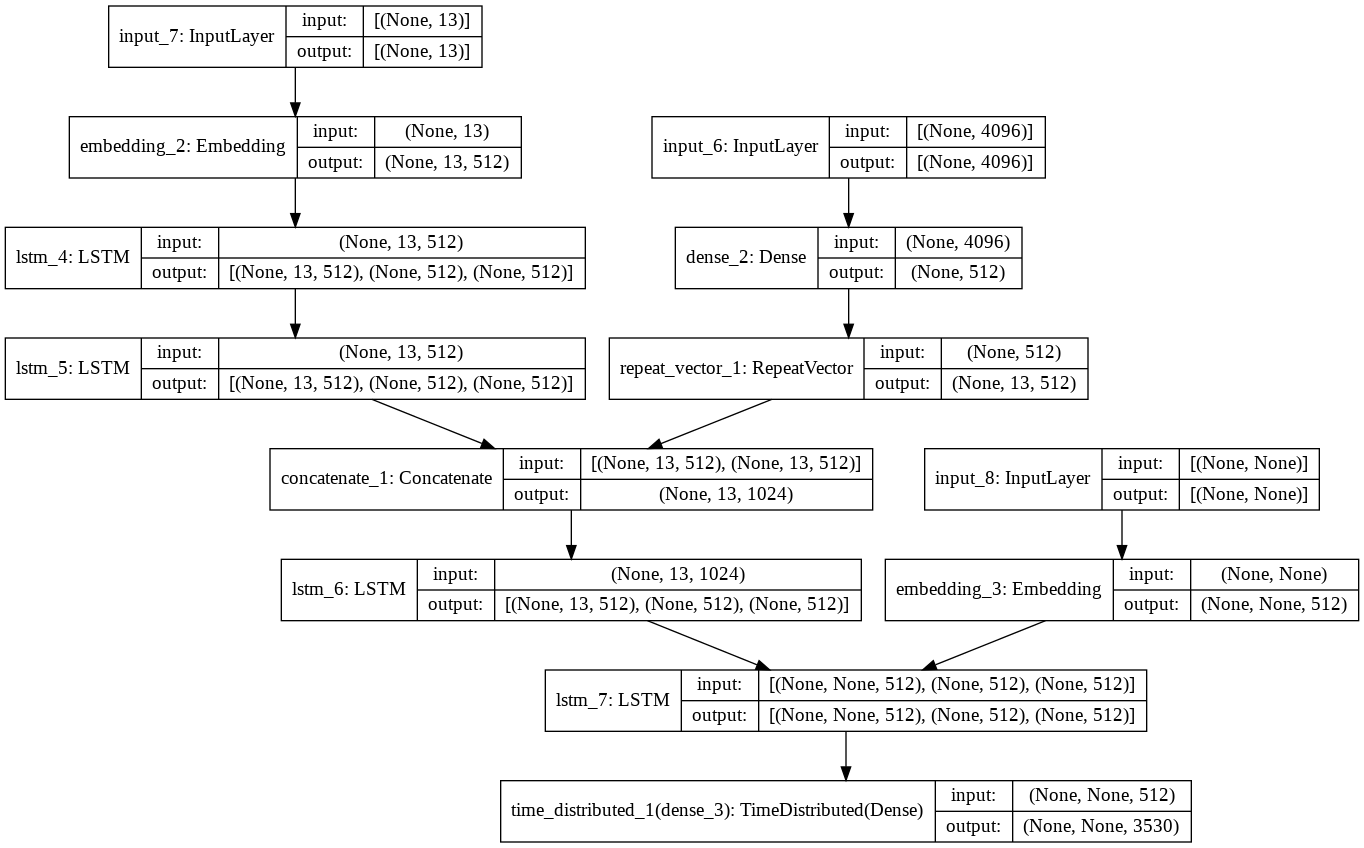

In [128]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
len(x_tr)

500

In [129]:
#compiling model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit([x_tr,y_tr[:,:-1],vgg_train_], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,validation_data=([x_val,y_val[:,:-1],vgg_val], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),epochs=100,batch_size=512)

Epoch 1/100
9/9 [==============================] - 15s 433ms/step - loss: 4.9554 - accuracy: 0.5369 - val_loss: 2.2884 - val_accuracy: 0.6478
Epoch 2/100
9/9 [==============================] - 3s 302ms/step - loss: 2.5749 - accuracy: 0.6244 - val_loss: 2.0487 - val_accuracy: 0.7115
Epoch 3/100
9/9 [==============================] - 3s 305ms/step - loss: 2.3819 - accuracy: 0.6532 - val_loss: 2.0066 - val_accuracy: 0.6850
Epoch 4/100
9/9 [==============================] - 3s 298ms/step - loss: 2.2862 - accuracy: 0.6557 - val_loss: 1.9589 - val_accuracy: 0.7002
Epoch 5/100
9/9 [==============================] - 3s 303ms/step - loss: 2.2277 - accuracy: 0.6728 - val_loss: 1.9106 - val_accuracy: 0.7092
Epoch 6/100
9/9 [==============================] - 3s 304ms/step - loss: 2.1678 - accuracy: 0.6919 - val_loss: 1.8535 - val_accuracy: 0.7285
Epoch 7/100
9/9 [==============================] - 3s 306ms/step - loss: 2.1127 - accuracy: 0.7048 - val_loss: 1.8060 - val_accuracy: 0.7422
Epoch 8/100


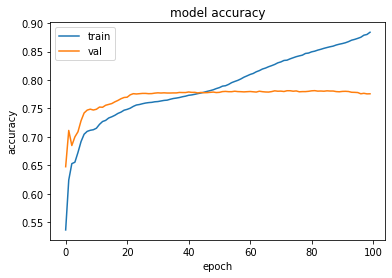

In [130]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

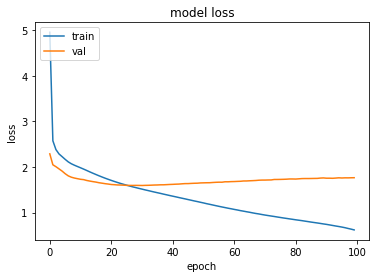

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [132]:
reverse_target_word_index=y_tokens.index_word
reverse_target_word_index

{1: 'sos',
 2: 'eos',
 3: 'ഒരു',
 4: 'കറുത്ത',
 5: 'വെളുത്ത',
 6: 'ധരിച്ച',
 7: 'സ്ത്രീ',
 8: 'ബാഗ്',
 9: 'മനുഷ്യൻ',
 10: 'ട്രാഷ്',
 11: 'വലിയ',
 12: 'പച്ച',
 13: 'നീല',
 14: 'ചുവന്ന',
 15: 'വർണ്ണാഭമായ',
 16: 'സ്കാർഫ്',
 17: 'വിൻഡോ',
 18: 'ചാരനിറത്തിലുള്ള',
 19: 'കെട്ടിടത്തിലെ',
 20: 'മഞ്ഞ',
 21: 'വ്യക്തി',
 22: 'കാർ',
 23: 'കെട്ടിടത്തിന്റെ',
 24: 'വെള്ള',
 25: 'വശത്ത്',
 26: 'ഇതൊരു',
 27: 'ചുവപ്പ്',
 28: 'ചെറിയ',
 29: 'മതിൽ',
 30: 'രണ്ട്',
 31: 'റോഡിന്റെ',
 32: 'ഒരാൾ',
 33: 'മേശപ്പുറത്ത്',
 34: 'രംഗം',
 35: 'ചിഹ്നം',
 36: 'പുല്ലിന്റെ',
 37: 'ഓറഞ്ച്',
 38: 'മുകളിൽ',
 39: 'ബീച്ച്',
 40: 'എഞ്ചിൻ',
 41: 'ഉള്ള',
 42: 'വശങ്ങളിൽ',
 43: 'പാർക്ക്',
 44: 'ദ്വീപ്',
 45: 'സ്ട്രിപ്പുകൾ',
 46: 'തെരുവിൽ',
 47: 'നിലത്ത്',
 48: 'വെള്ളയും',
 49: 'നടക്കുന്നു',
 50: 'ആളുകൾ',
 51: 'തവിട്ട്',
 52: 'തലം',
 53: 'മരം',
 54: 'നിറമുള്ള',
 55: 'ഇരിക്കുന്നു',
 56: 'ബസ്',
 57: 'പുല്ല്',
 58: 'ഷർട്ട്',
 59: 'കുഞ്ഞ്',
 60: 'ആന',
 61: 'നിൽക്കുന്ന',
 62: 'ജിറാഫ്',
 63: 'വെള്ളി',
 64: 'തെരുവ്',
 65: 'നിൽക്കുന്നു',
 66:

In [133]:

reverse_source_word_index=x_tokens.index_word
reverse_source_word_index

{1: 'a',
 2: 'the',
 3: 'on',
 4: 'of',
 5: 'is',
 6: 'in',
 7: 'white',
 8: 'man',
 9: 'building',
 10: 'black',
 11: 'and',
 12: 'red',
 13: 'with',
 14: 'wall',
 15: 'blue',
 16: 'window',
 17: 'person',
 18: 'green',
 19: 'side',
 20: 'wearing',
 21: 'woman',
 22: 'this',
 23: 'car',
 24: 'street',
 25: 'brown',
 26: 'yellow',
 27: 'sign',
 28: 'light',
 29: 'water',
 30: 'large',
 31: 'sky',
 32: 'table',
 33: 'shirt',
 34: 'train',
 35: 'standing',
 36: 'sitting',
 37: 'road',
 38: 'two',
 39: 'tree',
 40: 'holding',
 41: 'an',
 42: 'to',
 43: 'has',
 44: 'parked',
 45: 'bus',
 46: 'people',
 47: 'head',
 48: 'are',
 49: 'top',
 50: 'walking',
 51: 'small',
 52: 'orange',
 53: 'clock',
 54: 'plate',
 55: 'silver',
 56: 'boy',
 57: 'glass',
 58: 'grass',
 59: 'front',
 60: 'pole',
 61: 'truck',
 62: 'ground',
 63: 'wooden',
 64: 'boat',
 65: 'at',
 66: 'hair',
 67: 'sidewalk',
 68: 'dog',
 69: 'tennis',
 70: 'chair',
 71: 'down',
 72: 'riding',
 73: 'umbrella',
 74: 'bench',
 75: 

In [134]:

target_word_index=y_tokens.word_index
target_word_index

{'sos': 1,
 'eos': 2,
 'ഒരു': 3,
 'കറുത്ത': 4,
 'വെളുത്ത': 5,
 'ധരിച്ച': 6,
 'സ്ത്രീ': 7,
 'ബാഗ്': 8,
 'മനുഷ്യൻ': 9,
 'ട്രാഷ്': 10,
 'വലിയ': 11,
 'പച്ച': 12,
 'നീല': 13,
 'ചുവന്ന': 14,
 'വർണ്ണാഭമായ': 15,
 'സ്കാർഫ്': 16,
 'വിൻഡോ': 17,
 'ചാരനിറത്തിലുള്ള': 18,
 'കെട്ടിടത്തിലെ': 19,
 'മഞ്ഞ': 20,
 'വ്യക്തി': 21,
 'കാർ': 22,
 'കെട്ടിടത്തിന്റെ': 23,
 'വെള്ള': 24,
 'വശത്ത്': 25,
 'ഇതൊരു': 26,
 'ചുവപ്പ്': 27,
 'ചെറിയ': 28,
 'മതിൽ': 29,
 'രണ്ട്': 30,
 'റോഡിന്റെ': 31,
 'ഒരാൾ': 32,
 'മേശപ്പുറത്ത്': 33,
 'രംഗം': 34,
 'ചിഹ്നം': 35,
 'പുല്ലിന്റെ': 36,
 'ഓറഞ്ച്': 37,
 'മുകളിൽ': 38,
 'ബീച്ച്': 39,
 'എഞ്ചിൻ': 40,
 'ഉള്ള': 41,
 'വശങ്ങളിൽ': 42,
 'പാർക്ക്': 43,
 'ദ്വീപ്': 44,
 'സ്ട്രിപ്പുകൾ': 45,
 'തെരുവിൽ': 46,
 'നിലത്ത്': 47,
 'വെള്ളയും': 48,
 'നടക്കുന്നു': 49,
 'ആളുകൾ': 50,
 'തവിട്ട്': 51,
 'തലം': 52,
 'മരം': 53,
 'നിറമുള്ള': 54,
 'ഇരിക്കുന്നു': 55,
 'ബസ്': 56,
 'പുല്ല്': 57,
 'ഷർട്ട്': 58,
 'കുഞ്ഞ്': 59,
 'ആന': 60,
 'നിൽക്കുന്ന': 61,
 'ജിറാഫ്': 62,
 'വെള്ളി': 63,
 'തെരുവ്': 64,
 'നിൽക്കുന്നു': 65,
 'ട്

In [135]:

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=[encoder_inputs,img_inputs],outputs=[encoder_outputs, state_h, state_c])
encoder_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 13, 512)      1044480     input_7[0][0]                    
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 13, 512), (N 2099200     embedding_2[0][0]                
____________________________________________________________________________________________

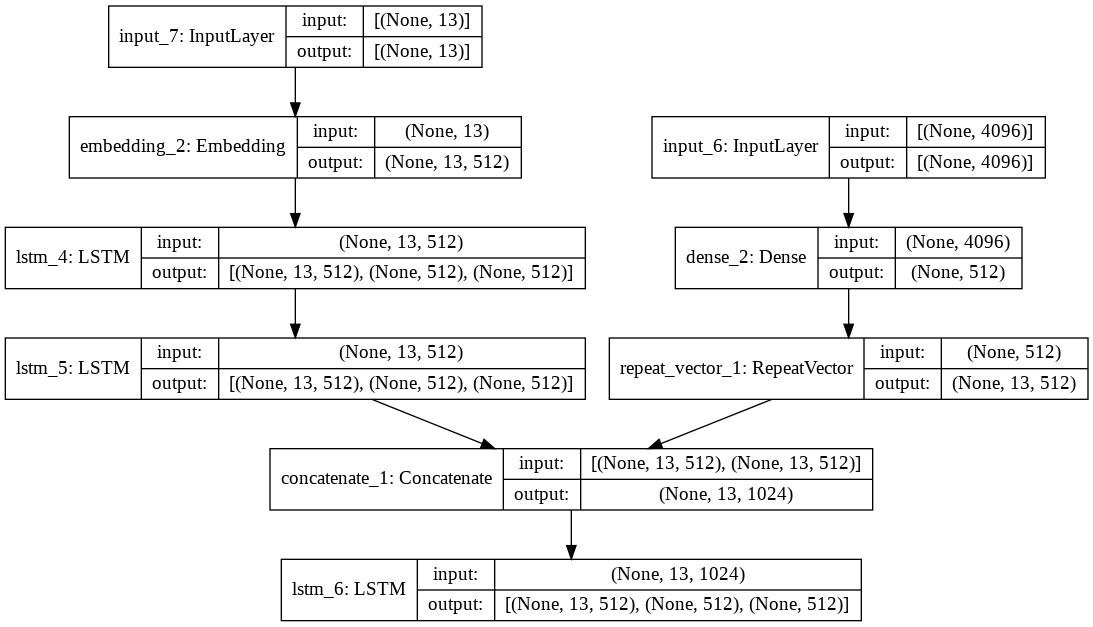

In [136]:
tf.keras.utils.plot_model(
    encoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [140]:
# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(maxlen_english,latent_dim))
print(decoder_inputs.get_shape)
#print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_8')>>


In [141]:

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])
decoder_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 512)    1807360     input_8[0][0]                    
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, 512)]        0                                            
____________________________________________________________________________________________

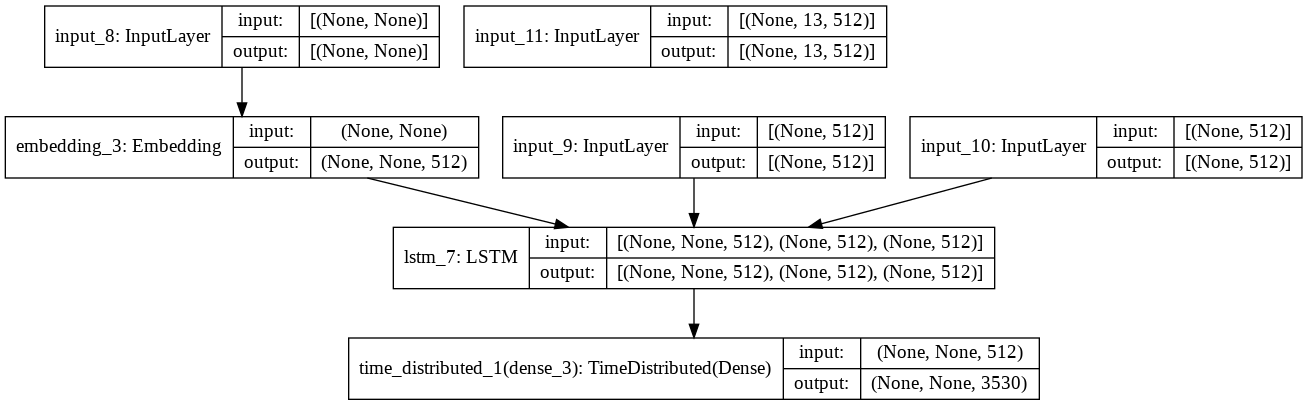

In [139]:
tf.keras.utils.plot_model(
    decoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [142]:
def decode_sequence(input_seq,img):
    img=img[np.newaxis,:]
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict([input_seq,img])
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sos']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eos'  or len(decoded_sentence.split()) >= (maxlen_malayalam -1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [143]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sos']) and i!=target_word_index['eos']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

for i in range(5):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
    print("\n")

Review: male surfer surfing in still in the ocean 
Original summary: ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ 
Predicted summary:  ഒരു വ്യക്തി നടക്കുന്നു


Review: it is an indoor scene 
Original summary: ഇത് ഒരു ഇൻഡോർ രംഗമാണ് 
Predicted summary:  ഇതൊരു കുളിമുറിയാണ്


Review: computer screens turned on 
Original summary: കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി 
Predicted summary:  മേശപ്പുറത്ത് കറുത്ത സിംഹ പ്രതിമ


Review: man has short hair 
Original summary: മനുഷ്യന് ചെറിയ മുടിയുണ്ട് 
Predicted summary:  കറുത്ത സ്യൂട്ട് ജാക്കറ്റ് ധരിച്ച മനുഷ്യൻ


Review: photo album open on an adults lap 
Original summary: ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു 
Predicted summary:  ചുമരിൽ ഘടിപ്പിച്ചിരിക്കുന്ന വെളുത്ത ഷവർഹെഡ്




Review: photo album open on an adults lap 
Predicted summary:  ചുമരിൽ ഘടിപ്പിച്ചിരിക്കുന്ന വെളുത്ത ഷവർഹെഡ്


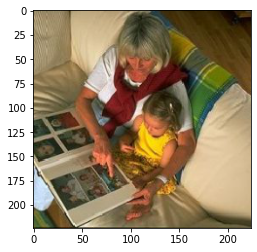

In [144]:
i=4
print("Review:",seq2text(x_tr[i]))
#print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
plt.imshow(imagedata[i].astype(np.float32))

Review: male surfer surfing in still in the ocean 
Original summary: ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ 
Predicted summary:  സമുദ്രത്തിലെ നല്ല തിരകൾ


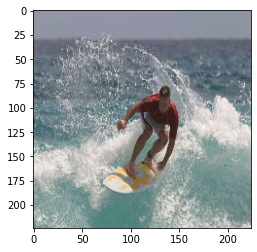

In [ ]:
i=0
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_len_english),vgg_imfea[i]))
plt.imshow(imagedata[i].astype(np.float32))

In [148]:
!pip install sacrebleu
import sacrebleu
import random

     |████████████████████████████████| 90 kB 3.9 MB/s 


In [149]:
temp_o=[]
temp_p=[]
for i in range(50):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,maxlen_english),vgg_train_[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

13.293934569155521


In [150]:
temp_o=[]
temp_p=[]
for i in range(5000):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,maxlen_english),vgg_train_[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

13.805804701931676
